In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

#set the graphs to show in the jupyter notebook
%matplotlib inline

#set seabor graphs to a better style
sns.set(style="ticks")

### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [2]:
customer=pd.read_csv('F:\Analytix_Labs\Python for data science\Case_Study\Python Foundation Case Study 1 - Retail Case Study\Customer.csv')
print(customer)

      customer_Id         DOB Gender  city_code
0          268408  02-01-1970      M        4.0
1          269696  07-01-1970      F        8.0
2          268159  08-01-1970      F        8.0
3          270181  10-01-1970      F        2.0
4          268073  11-01-1970      M        1.0
...           ...         ...    ...        ...
5642       274474  19-12-1992      M        2.0
5643       267666  24-12-1992      M        6.0
5644       270476  25-12-1992      F        3.0
5645       269626  27-12-1992      F        5.0
5646       274308  29-12-1992      F        5.0

[5647 rows x 4 columns]


In [3]:
prod_cat=pd.read_csv('F:\Analytix_Labs\Python for data science\Case_Study\Python Foundation Case Study 1 - Retail Case Study\prod_cat_info.csv')
print(prod_cat)

    prod_cat_code          prod_cat  prod_sub_cat_code          prod_subcat
0               1          Clothing                  4                 Mens
1               1          Clothing                  1                Women
2               1          Clothing                  3                 Kids
3               2          Footwear                  1                 Mens
4               2          Footwear                  3                Women
5               2          Footwear                  4                 Kids
6               3       Electronics                  4              Mobiles
7               3       Electronics                  5            Computers
8               3       Electronics                  8  Personal Appliances
9               3       Electronics                  9              Cameras
10              3       Electronics                 10      Audio and video
11              4              Bags                  1                 Mens
12          

In [4]:
transactions=pd.read_csv('F:\Analytix_Labs\Python for data science\Case_Study\Python Foundation Case Study 1 - Retail Case Study\Transactions.csv')
print(transactions)

       transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  \
0         80712190438   270351  28-02-2014                 1              1   
1         29258453508   270384  27-02-2014                 5              3   
2         51750724947   273420  24-02-2014                 6              5   
3         93274880719   271509  24-02-2014                11              6   
4         51750724947   273420  23-02-2014                 6              5   
...               ...      ...         ...               ...            ...   
23048     94340757522   274550  25-01-2011                12              5   
23049     89780862956   270022  25-01-2011                 4              1   
23050     85115299378   271020  25-01-2011                 2              6   
23051     72870271171   270911  25-01-2011                11              5   
23052     77960931771   271961  25-01-2011                11              5   

       Qty  Rate      Tax  total_amt Store_type  
0

In [5]:
prod1=pd.merge(prod_cat,transactions,left_on='prod_cat_code',right_on='prod_subcat_code')
print(prod1)

       prod_cat_code_x          prod_cat  prod_sub_cat_code prod_subcat  \
0                    1          Clothing                  4        Mens   
1                    1          Clothing                  4        Mens   
2                    1          Clothing                  4        Mens   
3                    1          Clothing                  4        Mens   
4                    1          Clothing                  4        Mens   
...                ...               ...                ...         ...   
44909                6  Home and kitchen                 12       Tools   
44910                6  Home and kitchen                 12       Tools   
44911                6  Home and kitchen                 12       Tools   
44912                6  Home and kitchen                 12       Tools   
44913                6  Home and kitchen                 12       Tools   

       transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code_y  \
0         80712190

In [6]:
customer_final=pd.merge(prod1,customer,left_on='cust_id',right_on='customer_Id')
print(customer_final)

       prod_cat_code_x          prod_cat  prod_sub_cat_code prod_subcat  \
0                    1          Clothing                  4        Mens   
1                    1          Clothing                  4        Mens   
2                    1          Clothing                  1       Women   
3                    1          Clothing                  1       Women   
4                    1          Clothing                  3        Kids   
...                ...               ...                ...         ...   
44909                6  Home and kitchen                 12       Tools   
44910                6  Home and kitchen                  2  Furnishing   
44911                6  Home and kitchen                 10     Kitchen   
44912                6  Home and kitchen                 11        Bath   
44913                6  Home and kitchen                 12       Tools   

       transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code_y  \
0         80712190

In [7]:
customer_final.shape

(44914, 18)

In [8]:
customer_final.isnull().sum()

prod_cat_code_x       0
prod_cat              0
prod_sub_cat_code     0
prod_subcat           0
transaction_id        0
cust_id               0
tran_date             0
prod_subcat_code      0
prod_cat_code_y       0
Qty                   0
Rate                  0
Tax                   0
total_amt             0
Store_type            0
customer_Id           0
DOB                   0
Gender               17
city_code            18
dtype: int64

### 2. Prepare a summary report for the merged data set.

### a. Get the column names and their corresponding data types 

### b. Top/Bottom 10 observations

###  c “Five-number summary” for continuous variables (min, Q1, median, Q3 and max) 

### d. Frequency tables for all the categorical variables 

In [9]:
customer_final["DOB"] = pd.to_datetime(customer_final["DOB"], format="%d-%m-%Y")
customer_final['DOB']

0       1981-09-26
1       1981-09-26
2       1981-09-26
3       1981-09-26
4       1981-09-26
           ...    
44909   1979-03-16
44910   1990-11-20
44911   1990-11-20
44912   1990-11-20
44913   1990-11-20
Name: DOB, Length: 44914, dtype: datetime64[ns]

In [10]:
customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"])
customer_final["tran_date"]

0       2014-02-28
1       2014-02-20
2       2014-02-28
3       2014-02-20
4       2014-02-28
           ...    
44909   2011-10-02
44910   2011-10-02
44911   2011-10-02
44912   2011-10-02
44913   2011-10-02
Name: tran_date, Length: 44914, dtype: datetime64[ns]

In [11]:
customer_final.drop_duplicates(inplace=True)

In [12]:
customer_final.columns

Index(['prod_cat_code_x', 'prod_cat', 'prod_sub_cat_code', 'prod_subcat',
       'transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code_y', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'customer_Id', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [13]:
customer_final.dtypes

prod_cat_code_x               int64
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
transaction_id                int64
cust_id                       int64
tran_date            datetime64[ns]
prod_subcat_code              int64
prod_cat_code_y               int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
dtype: object

In [14]:
customer_final.head(10)

,prod_cat_code_x,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_y,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
0,1,Clothing,4,Mens,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0
1,1,Clothing,4,Mens,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,270351,1981-09-26,M,5.0
2,1,Clothing,1,Women,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0
3,1,Clothing,1,Women,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,270351,1981-09-26,M,5.0
4,1,Clothing,3,Kids,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0
5,1,Clothing,3,Kids,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,270351,1981-09-26,M,5.0
6,3,Electronics,4,Mobiles,36957441426,270351,2013-09-16,3,2,3,361,113.715,1196.715,Flagship store,270351,1981-09-26,M,5.0
7,3,Electronics,5,Computers,36957441426,270351,2013-09-16,3,2,3,361,113.715,1196.715,Flagship store,270351,1981-09-26,M,5.0
8,3,Electronics,8,Personal Appliances,36957441426,270351,2013-09-16,3,2,3,361,113.715,1196.715,Flagship store,270351,1981-09-26,M,5.0
9,3,Electronics,9,Cameras,36957441426,270351,2013-09-16,3,2,3,361,113.715,1196.715,Flagship store,270351,1981-09-26,M,5.0


In [15]:
customer_final.tail(10)

,prod_cat_code_x,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_y,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
44904,6,Home and kitchen,11,Bath,4286893457,274054,2011-02-17,6,5,5,811,425.775,4480.775,e-Shop,274054,1974-07-20,M,3.0
44905,6,Home and kitchen,12,Tools,4286893457,274054,2011-02-17,6,5,5,811,425.775,4480.775,e-Shop,274054,1974-07-20,M,3.0
44906,6,Home and kitchen,2,Furnishing,58172084993,273985,2011-10-02,6,5,5,1450,761.250,8011.250,TeleShop,273985,1979-03-16,F,1.0
44907,6,Home and kitchen,10,Kitchen,58172084993,273985,2011-10-02,6,5,5,1450,761.250,8011.250,TeleShop,273985,1979-03-16,F,1.0
44908,6,Home and kitchen,11,Bath,58172084993,273985,2011-10-02,6,5,5,1450,761.250,8011.250,TeleShop,273985,1979-03-16,F,1.0
44909,6,Home and kitchen,12,Tools,58172084993,273985,2011-10-02,6,5,5,1450,761.250,8011.250,TeleShop,273985,1979-03-16,F,1.0
44910,6,Home and kitchen,2,Furnishing,98829095624,269944,2011-10-02,6,5,1,1274,133.770,1407.770,e-Shop,269944,1990-11-20,F,4.0
44911,6,Home and kitchen,10,Kitchen,98829095624,269944,2011-10-02,6,5,1,1274,133.770,1407.770,e-Shop,269944,1990-11-20,F,4.0
44912,6,Home and kitchen,11,Bath,98829095624,269944,2011-10-02,6,5,1,1274,133.770,1407.770,e-Shop,269944,1990-11-20,F,4.0
44913,6,Home and kitchen,12,Tools,98829095624,269944,2011-10-02,6,5,1,1274,133.770,1407.770,e-Shop,269944,1990-11-20,F,4.0


In [16]:
customer_final.describe()

,prod_cat_code_x,prod_sub_cat_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code_y,Qty,Rate,Tax,total_amt,customer_Id,city_code
count,44894.000000,44894.000000,4.489400e+04,44894.000000,44894.000000,44894.000000,44894.000000,44894.000000,44894.000000,44894.000000,44894.000000,44876.000000
mean,3.237337,5.424712,5.014824e+10,271002.451352,3.237337,3.053927,2.422128,638.131710,248.934888,2098.244882,271002.451352,5.496435
std,1.510764,3.439091,2.920040e+10,2434.606511,1.510764,1.622001,2.273227,624.506135,187.104222,2517.465619,2434.606511,2.869222
min,1.000000,1.000000,1.086136e+07,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000
25%,2.000000,3.000000,2.449241e+10,268903.000000,2.000000,2.000000,1.000000,315.000000,99.435000,764.936250,268903.000000,3.000000
50%,3.000000,4.000000,5.047993e+10,270968.000000,3.000000,3.000000,3.000000,713.000000,199.080000,1745.900000,270968.000000,5.000000
75%,4.000000,9.000000,7.596849e+10,273119.000000,4.000000,5.000000,4.000000,1116.000000,366.660000,3553.680000,273119.000000,8.000000
max,6.000000,12.000000,9.998675e+10,275265.000000,6.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000


In [17]:
customer_final.loc[:,customer_final.dtypes=="object"].describe()

,prod_cat,prod_subcat,Store_type,Gender
count,44894,44894,44894,44877
unique,6,18,4,2
top,Electronics,Mens,e-Shop,M
freq,15325,7955,17998,22797


### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [19]:
continous_variables = customer_final.loc[:,['prod_subcat_code','prod_cat_code_y', 'Qty', 'Rate', 'Tax', 'total_amt']]
continous_variables.columns

Index(['prod_subcat_code', 'prod_cat_code_y', 'Qty', 'Rate', 'Tax',
       'total_amt'],
      dtype='object')

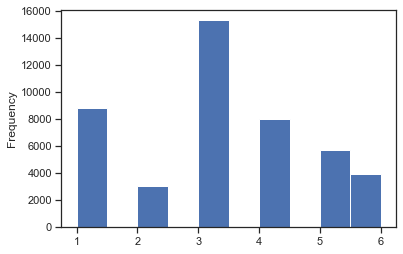

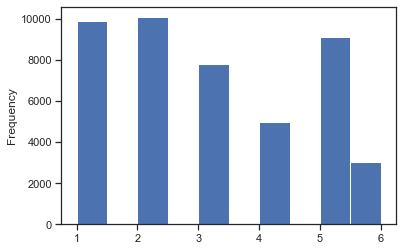

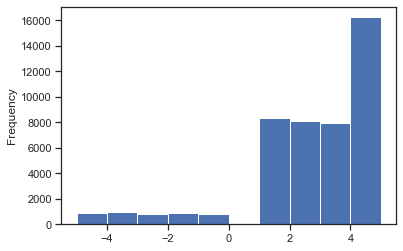

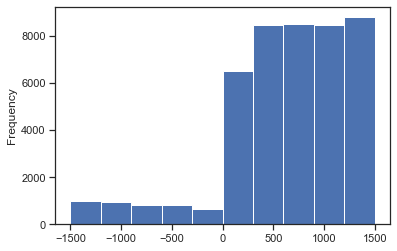

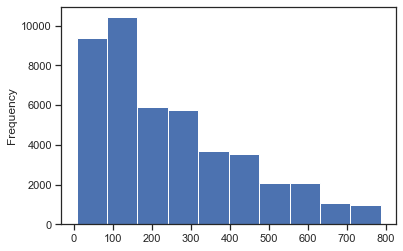

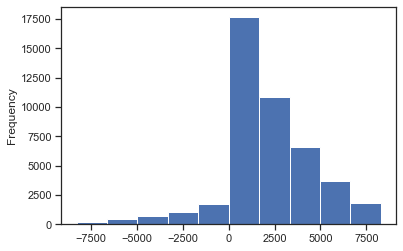

In [21]:
for var in continous_variables.columns:
    continous_variables[var].plot(kind='hist')
    plt.show()

In [23]:
categorical_variables = customer_final.loc[:,customer_final.dtypes=='object']
print(categorical_variables)

               prod_cat prod_subcat Store_type Gender
0              Clothing        Mens     e-Shop      M
1              Clothing        Mens     e-Shop      M
2              Clothing       Women     e-Shop      M
3              Clothing       Women     e-Shop      M
4              Clothing        Kids     e-Shop      M
...                 ...         ...        ...    ...
44909  Home and kitchen       Tools   TeleShop      F
44910  Home and kitchen  Furnishing     e-Shop      F
44911  Home and kitchen     Kitchen     e-Shop      F
44912  Home and kitchen        Bath     e-Shop      F
44913  Home and kitchen       Tools     e-Shop      F

[44894 rows x 4 columns]


In [24]:
categorical_variables.head()

,prod_cat,prod_subcat,Store_type,Gender
0,Clothing,Mens,e-Shop,M
1,Clothing,Mens,e-Shop,M
2,Clothing,Women,e-Shop,M
3,Clothing,Women,e-Shop,M
4,Clothing,Kids,e-Shop,M


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


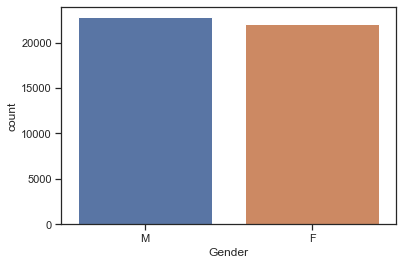

In [26]:
sns.countplot(categorical_variables['Gender'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


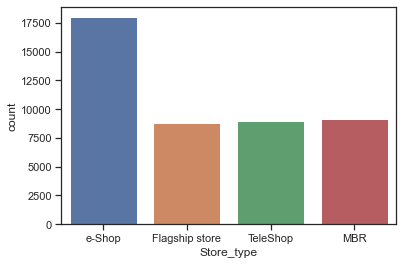

In [27]:
sns.countplot(categorical_variables['Store_type'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


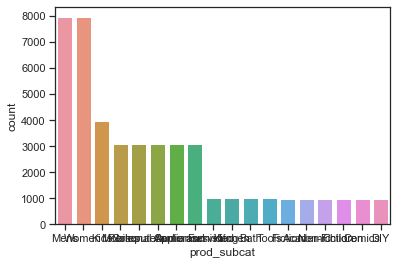

In [28]:
sns.countplot(categorical_variables['prod_subcat'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


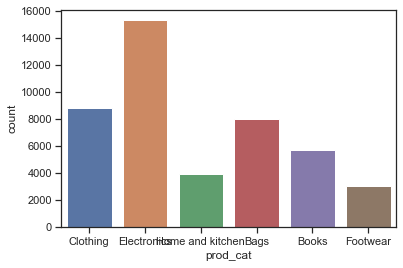

In [29]:
sns.countplot(categorical_variables['prod_cat'])
plt.show()

### 4. Calculate the following information using the merged dataset :

### a. Time period of the available transaction data
### b. Count of transactions where the total amount of transaction was negative

In [30]:
customer_final.sort_values(by="tran_date")

,prod_cat_code_x,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_y,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
36507,3,Electronics,4,Mobiles,96261500165,270582,2011-01-02,3,2,2,734,154.140,1622.140,Flagship store,270582,1974-07-01,M,5.0
2683,1,Clothing,3,Kids,14744074495,272122,2011-01-02,1,2,5,475,249.375,2624.375,TeleShop,272122,1984-11-05,M,4.0
42762,5,Books,3,Comics,80348907828,267124,2011-01-02,5,3,2,552,115.920,1219.920,TeleShop,267124,1974-08-21,M,2.0
42763,5,Books,6,DIY,80348907828,267124,2011-01-02,5,3,2,552,115.920,1219.920,TeleShop,267124,1974-08-21,M,2.0
27121,5,Books,7,Fiction,20412822036,267217,2011-01-02,5,3,3,1258,396.270,4170.270,Flagship store,267217,1987-03-23,M,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13433,2,Footwear,1,Mens,36792372906,275246,2014-12-02,2,6,1,1185,124.425,1309.425,e-Shop,275246,1970-06-25,M,3.0
13435,2,Footwear,3,Women,36792372906,275246,2014-12-02,2,6,1,1185,124.425,1309.425,e-Shop,275246,1970-06-25,M,3.0
14016,4,Bags,1,Mens,55245382907,270810,2014-12-02,4,3,2,979,205.590,2163.590,TeleShop,270810,1972-03-01,F,1.0
20763,3,Electronics,10,Audio and video,15403541663,266794,2014-12-02,3,2,2,322,67.620,711.620,e-Shop,266794,1971-02-28,F,9.0


In [31]:
customer_final['tran_date']

0       2014-02-28
1       2014-02-20
2       2014-02-28
3       2014-02-20
4       2014-02-28
           ...    
44909   2011-10-02
44910   2011-10-02
44911   2011-10-02
44912   2011-10-02
44913   2011-10-02
Name: tran_date, Length: 44894, dtype: datetime64[ns]

In [32]:
customer_final.head(100)

,prod_cat_code_x,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_y,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
0,1,Clothing,4,Mens,80712190438,270351,2014-02-28,1,1,-5,-772,405.30,-4265.30,e-Shop,270351,1981-09-26,M,5.0
1,1,Clothing,4,Mens,80712190438,270351,2014-02-20,1,1,5,772,405.30,4265.30,e-Shop,270351,1981-09-26,M,5.0
2,1,Clothing,1,Women,80712190438,270351,2014-02-28,1,1,-5,-772,405.30,-4265.30,e-Shop,270351,1981-09-26,M,5.0
3,1,Clothing,1,Women,80712190438,270351,2014-02-20,1,1,5,772,405.30,4265.30,e-Shop,270351,1981-09-26,M,5.0
4,1,Clothing,3,Kids,80712190438,270351,2014-02-28,1,1,-5,-772,405.30,-4265.30,e-Shop,270351,1981-09-26,M,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,Clothing,3,Kids,75927432534,267500,2014-02-14,1,4,2,845,177.45,1867.45,e-Shop,267500,1987-07-18,M,10.0
96,3,Electronics,4,Mobiles,30797355871,267500,2011-07-22,3,2,2,294,61.74,649.74,e-Shop,267500,1987-07-18,M,10.0
97,3,Electronics,4,Mobiles,60331619920,267500,2011-07-21,3,5,4,687,288.54,3036.54,TeleShop,267500,1987-07-18,M,10.0
98,3,Electronics,5,Computers,30797355871,267500,2011-07-22,3,2,2,294,61.74,649.74,e-Shop,267500,1987-07-18,M,10.0


In [33]:
customer_final.tail(100)

,prod_cat_code_x,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_y,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
44814,6,Home and kitchen,2,Furnishing,32448535705,266858,2011-09-13,6,5,2,296,62.16,654.16,MBR,266858,1987-02-25,M,1.0
44815,6,Home and kitchen,10,Kitchen,32448535705,266858,2011-09-13,6,5,2,296,62.16,654.16,MBR,266858,1987-02-25,M,1.0
44816,6,Home and kitchen,11,Bath,32448535705,266858,2011-09-13,6,5,2,296,62.16,654.16,MBR,266858,1987-02-25,M,1.0
44817,6,Home and kitchen,12,Tools,32448535705,266858,2011-09-13,6,5,2,296,62.16,654.16,MBR,266858,1987-02-25,M,1.0
44818,6,Home and kitchen,2,Furnishing,46754765556,267726,2011-08-19,6,5,-4,-863,362.46,-3814.46,MBR,267726,1984-05-26,M,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44909,6,Home and kitchen,12,Tools,58172084993,273985,2011-10-02,6,5,5,1450,761.25,8011.25,TeleShop,273985,1979-03-16,F,1.0
44910,6,Home and kitchen,2,Furnishing,98829095624,269944,2011-10-02,6,5,1,1274,133.77,1407.77,e-Shop,269944,1990-11-20,F,4.0
44911,6,Home and kitchen,10,Kitchen,98829095624,269944,2011-10-02,6,5,1,1274,133.77,1407.77,e-Shop,269944,1990-11-20,F,4.0
44912,6,Home and kitchen,11,Bath,98829095624,269944,2011-10-02,6,5,1,1274,133.77,1407.77,e-Shop,269944,1990-11-20,F,4.0


In [35]:
min_date = customer_final["tran_date"].min()
print(min_date)

2011-01-02 00:00:00


In [36]:
max_date = customer_final["tran_date"].max()
print(max_date)

2014-12-02 00:00:00


In [37]:
difference =(max_date-min_date)
print(difference)

1430 days 00:00:00


In [41]:
#negative transactions count
customer_final.loc[customer_final["total_amt"] < 0,"transaction_id"].count()

4235

### 5. Analyze which product categories are more popular among females vs male customers.

In [44]:
customer_final.groupby(["Gender","prod_cat"])[["Qty"]].sum()

Qty
Gender prod_cat               
F      Bags               9548
       Books              6840
       Clothing          10059
       Electronics       18495
       Footwear           3489
       Home and kitchen   4600
M      Bags              10110
       Books              7530
       Clothing          11106
       Electronics       18115
       Footwear           3816
       Home and kitchen   5016

### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [54]:
city_code=customer_final.groupby('city_code')['customer_Id'].count().sort_values(ascending=True)
print(city_code)

city_code
6.0     4171
9.0     4326
2.0     4441
1.0     4458
4.0     4501
10.0    4534
8.0     4571
3.0     4583
7.0     4621
5.0     4670
Name: customer_Id, dtype: int64


In [46]:
#city code 5.0 has max customer

In [57]:
percentage = (city_code[5.0]/city_code.sum())*100
print(percentage)

10.406453338087173


### 7. Which store type sells the maximum products by value and by quantity?

In [59]:
customer_final.groupby('Store_type')['Qty','Rate'].sum().sort_values(by='Qty',ascending=False)

<ipython-input-59-6557e25d8ecf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer_final.groupby('Store_type')['Qty','Rate'].sum().sort_values(by='Qty',ascending=False)


,Qty,Rate
Store_type,,
e-Shop,44234,11609035
TeleShop,21555,5587320
MBR,21537,5698147
Flagship store,21413,5753783


In [60]:
#Eshop sells more

### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [65]:
customer_final.groupby(['prod_cat'])['Rate'].sum().reset_index()

,prod_cat,Rate
0,Bags,5058716
1,Books,3751050
2,Clothing,5608203
3,Electronics,9760820
4,Footwear,1909452
5,Home and kitchen,2560044


In [66]:
amount_earned=9760820+5608203

15369023

### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [67]:
male = customer_final.pivot_table(index = "prod_cat",columns="Gender", values="total_amt", aggfunc='sum')
print(male)

Gender                       F             M
prod_cat                                    
Bags              8.355966e+06  8.556061e+06
Books             5.992194e+06  6.548504e+06
Clothing          8.896310e+06  9.698775e+06
Electronics       1.584314e+07  1.566451e+07
Footwear          3.059321e+06  3.236464e+06
Home and kitchen  4.024366e+06  4.315277e+06


In [70]:
male_customer = male.loc['Electronics','M']
print(male_customer)

15664513.149999967


In [71]:
round(male_customer,2)

15664513.15

### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [76]:
a1=customer_final.loc[customer_final["total_amt"]>0,:]
print(a1)

       prod_cat_code_x          prod_cat  prod_sub_cat_code prod_subcat  \
1                    1          Clothing                  4        Mens   
3                    1          Clothing                  1       Women   
5                    1          Clothing                  3        Kids   
6                    3       Electronics                  4     Mobiles   
7                    3       Electronics                  5   Computers   
...                ...               ...                ...         ...   
44909                6  Home and kitchen                 12       Tools   
44910                6  Home and kitchen                  2  Furnishing   
44911                6  Home and kitchen                 10     Kitchen   
44912                6  Home and kitchen                 11        Bath   
44913                6  Home and kitchen                 12       Tools   

       transaction_id  cust_id  tran_date  prod_subcat_code  prod_cat_code_y  \
1         807121904

In [79]:
unique1= a1.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()
print(unique1)

       customer_Id  prod_cat prod_subcat  transaction_id
0           266783      Bags        Mens               2
1           266783      Bags       Women               2
2           266783  Clothing        Kids               1
3           266783  Clothing        Mens               1
4           266783  Clothing       Women               1
...            ...       ...         ...             ...
33516       275265  Clothing        Mens               1
33517       275265  Clothing       Women               1
33518       275265  Footwear        Kids               1
33519       275265  Footwear        Mens               1
33520       275265  Footwear       Women               1

[33521 rows x 4 columns]


In [80]:
unique1[unique1['transaction_id'] > 10]

,customer_Id,prod_cat,prod_subcat,transaction_id


### 11. For all customers aged between 25 - 35, find out:


### a. What was the total amount spent for “Electronics” and “Books” product categories?
 

###  b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [84]:
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'],format='%m%d%y')
customer_final['DOB'] = customer_final['DOB'].where(customer_final['DOB'] < pd.Timestamp('now'), customer_final['DOB'] -np.timedelta64(100, 'Y'))
customer_final['AGE'] = (pd.Timestamp('now') - customer_final['DOB']).astype('<m8[Y]')
print(customer_final)

       prod_cat_code_x          prod_cat  prod_sub_cat_code prod_subcat  \
0                    1          Clothing                  4        Mens   
1                    1          Clothing                  4        Mens   
2                    1          Clothing                  1       Women   
3                    1          Clothing                  1       Women   
4                    1          Clothing                  3        Kids   
...                ...               ...                ...         ...   
44909                6  Home and kitchen                 12       Tools   
44910                6  Home and kitchen                  2  Furnishing   
44911                6  Home and kitchen                 10     Kitchen   
44912                6  Home and kitchen                 11        Bath   
44913                6  Home and kitchen                 12       Tools   

       transaction_id  cust_id  tran_date  prod_subcat_code  prod_cat_code_y  \
0         807121904

In [86]:
customer_final['Age_cat'] =customer_final['Age_cat'] = pd.cut(customer_final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)
print(customer_final)

       prod_cat_code_x          prod_cat  prod_sub_cat_code prod_subcat  \
0                    1          Clothing                  4        Mens   
1                    1          Clothing                  4        Mens   
2                    1          Clothing                  1       Women   
3                    1          Clothing                  1       Women   
4                    1          Clothing                  3        Kids   
...                ...               ...                ...         ...   
44909                6  Home and kitchen                 12       Tools   
44910                6  Home and kitchen                  2  Furnishing   
44911                6  Home and kitchen                 10     Kitchen   
44912                6  Home and kitchen                 11        Bath   
44913                6  Home and kitchen                 12       Tools   

       transaction_id  cust_id  tran_date  prod_subcat_code  prod_cat_code_y  \
0         807121904

In [87]:
age1=customer_final.groupby(['Age_cat','prod_cat'])['total_amt'].sum()
print(age1)

Age_cat  prod_cat        
25-35    Bags                5.392904e+06
         Books               4.153516e+06
         Clothing            5.980078e+06
         Electronics         9.719851e+06
         Footwear            2.231472e+06
         Home and kitchen    2.309591e+06
36-46    Bags                7.979256e+06
         Books               5.533531e+06
         Clothing            8.779509e+06
         Electronics         1.513240e+07
         Footwear            2.854745e+06
         Home and kitchen    4.228649e+06
47-57    Bags                3.544966e+06
         Books               2.853651e+06
         Clothing            3.835498e+06
         Electronics         6.656940e+06
         Footwear            1.209567e+06
         Home and kitchen    1.802480e+06
Name: total_amt, dtype: float64


In [90]:
age1.dtypes

dtype('float64')

In [92]:
age1.loc['25-35',['Books','Electronics']] #total amount

Age_cat  prod_cat   
25-35    Books          4153515.990
         Electronics    9719850.725
Name: total_amt, dtype: float64

In [94]:
age2=customer_final[customer_final['Age_cat']=='25-35']
print(age2)

       prod_cat_code_x          prod_cat  prod_sub_cat_code prod_subcat  \
22                   1          Clothing                  4        Mens   
23                   1          Clothing                  1       Women   
24                   1          Clothing                  3        Kids   
25                   3       Electronics                  4     Mobiles   
26                   3       Electronics                  5   Computers   
...                ...               ...                ...         ...   
44901                6  Home and kitchen                 12       Tools   
44910                6  Home and kitchen                  2  Furnishing   
44911                6  Home and kitchen                 10     Kitchen   
44912                6  Home and kitchen                 11        Bath   
44913                6  Home and kitchen                 12       Tools   

       transaction_id  cust_id  tran_date  prod_subcat_code  prod_cat_code_y  \
22        911162917

In [99]:
amount=age2[(age2['tran_date'] >='2014-01-01') & (age2['tran_date'] <='2014-03-01')]
print(amount)

       prod_cat_code_x  prod_cat  prod_sub_cat_code  prod_subcat  \
22                   1  Clothing                  4         Mens   
23                   1  Clothing                  1        Women   
24                   1  Clothing                  3         Kids   
64                   1  Clothing                  4         Mens   
65                   1  Clothing                  1        Women   
...                ...       ...                ...          ...   
43364                5     Books                 12     Academic   
43366                5     Books                 10  Non-Fiction   
43368                5     Books                 11     Children   
43370                5     Books                  3       Comics   
43372                5     Books                  6          DIY   

       transaction_id  cust_id  tran_date  prod_subcat_code  prod_cat_code_y  \
22        91116291703   268509 2014-02-20                 1                2   
23        91116291703  

In [101]:
amount['total_amt'].sum()

1009240.7